In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

#### Будем использовать распределение хи-квадрат


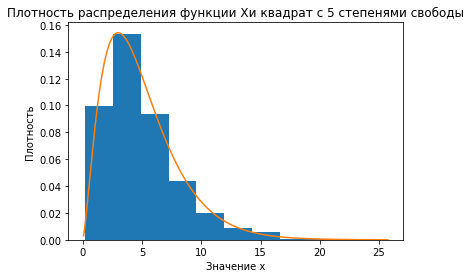

In [2]:
%matplotlib inline

#  В распределении есть гиперпараметр k (количество степеней свободы), примем его равным пяти
df = 5 

# вычисляем значения плотности вероятности 
y  = chi2.rvs(df, size=1000)

# строим теоретическую плотность распределения
x  = np.linspace(chi2.ppf(0.0001, df), chi2.ppf(0.9999, df), 100000)
y1 = chi2.pdf(x, df)

plt.hist(y, density=True)
plt.plot(x, y1)
plt.title('Плотность распределения функции Хи квадрат с 5 степенями свободы')
plt.xlabel("Значение х")
plt.ylabel("Плотность")
plt.show()


Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

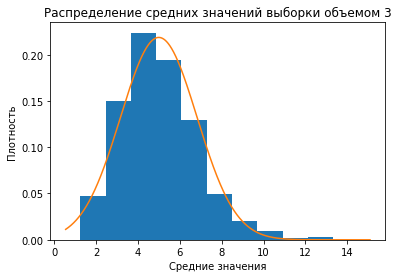

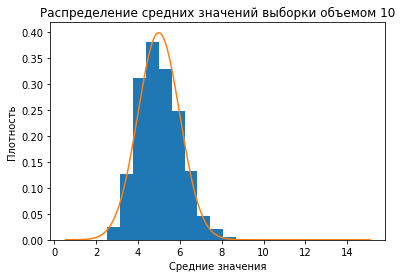

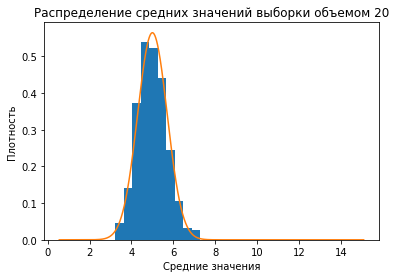

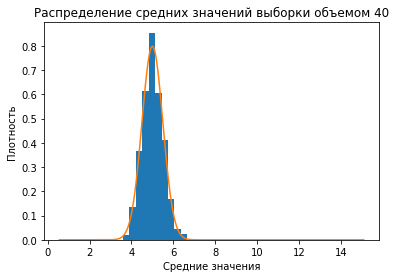

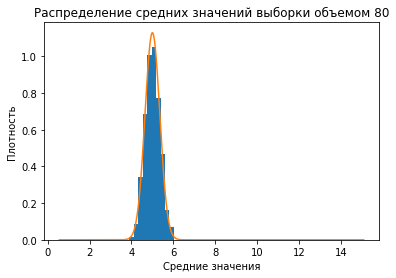

In [3]:
# Теоретические матожидание и дисперсия:
E = df
D = 2 * df

n = [3, 10, 20, 40, 80]
func = lambda: chi2.rvs(df, size=1)[0]

for i in n:
    
    # генерируем тысячу выборок объемом i:
    samples = [[func() for _ in range(i)] for _ in range(1000)]
    
    # ищем средние значения:
    mean_samples = [np.mean(i) for i in samples]
    
    # строим теоритическую плотность нормального распределения:
    x  = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 10000)
    y = norm(loc=E, scale=(D / i)**0.5).pdf(x)
    
    # выводим данные в виде графиков:
    plt.figure()
    plt.hist(mean_samples, density=True)
    plt.xlabel("Средние значения")
    plt.ylabel("Плотность")
    plt.title('Распределение средних значений выборки объемом ' + str(i))
    plt.plot(x, y)

### Вывод
Судя по графикам, с увеличением объема выборки, растет точность приближения нормальным распределением выборочных средних рассмотренного распределения (хи квадрат)